## **5장 선형 회귀 모델: 먼저 긋고 수정하기**

### **경사하강법**

#### MSE를 a로 미분하기 검증

In [2]:
## MSE를 a로 미분하기 검증
import sympy as sp
a, b, x_i, y_i = sp.symbols('a b x_i y_i')
MSE_i = (y_i - (a * x_i + b))**2
MSE_i

(-a*x_i - b + y_i)**2

In [3]:
## MSE를 a로 미분
sp.Derivative(MSE_i, a).doit()

-2*x_i*(-a*x_i - b + y_i)

In [4]:
## MSE를 b로 미분
sp.factor(sp.Derivative(MSE_i, b).doit())

2*(a*x_i + b - y_i)

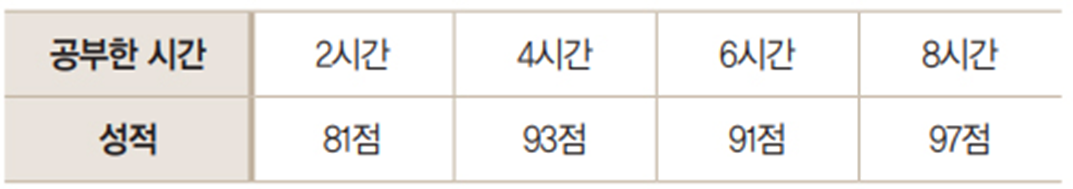

epoch=0,  기울기=26.7400,   절편=6.0700,   Cost(MSE)=7157.0000


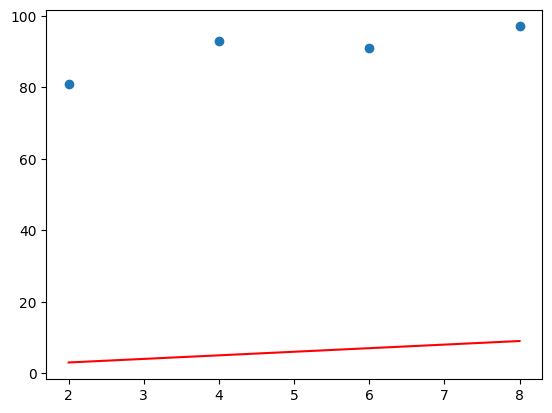

epoch=100,  기울기=7.0233,   절편=50.8133,   Cost(MSE)=143.3492


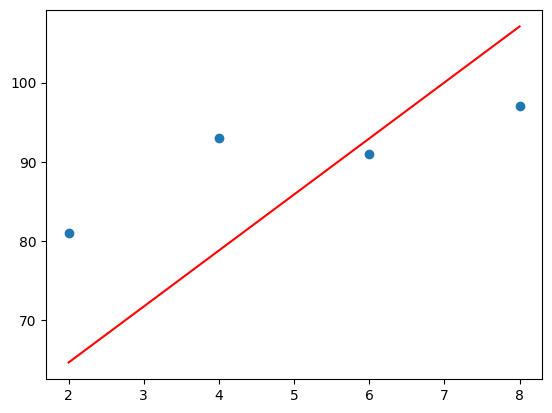

epoch=200,  기울기=4.0770,   절편=68.3957,   Cost(MSE)=27.4146


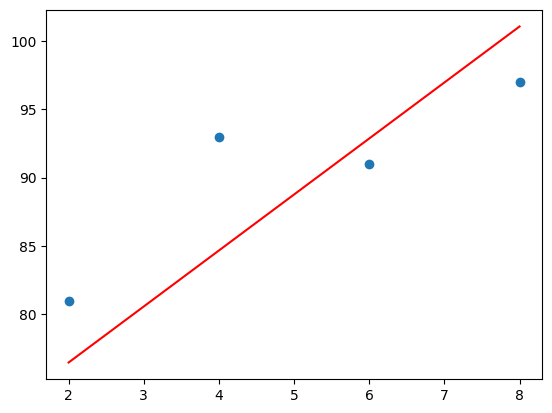

epoch=300,  기울기=2.9685,   절편=75.0105,   Cost(MSE)=11.0054


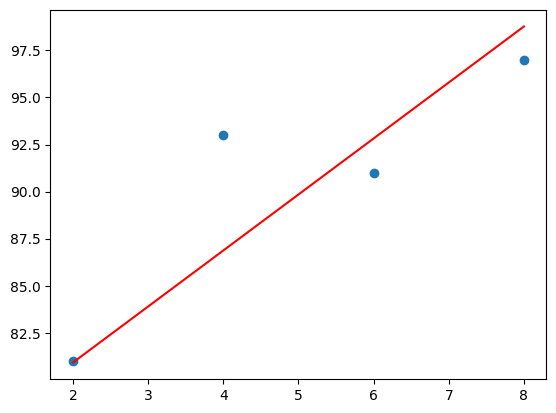

epoch=400,  기울기=2.5515,   절편=77.4991,   Cost(MSE)=8.6829


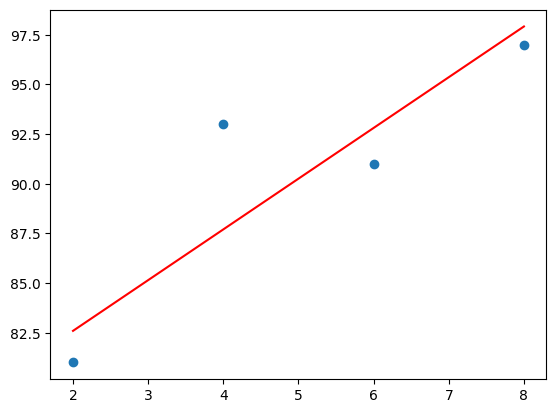

epoch=500,  기울기=2.3946,   절편=78.4353,   Cost(MSE)=8.3542


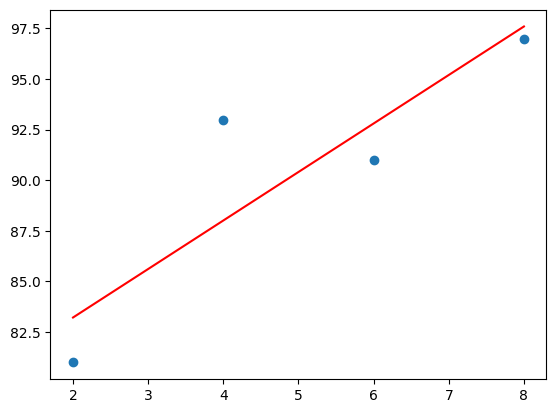

epoch=600,  기울기=2.3356,   절편=78.7876,   Cost(MSE)=8.3077


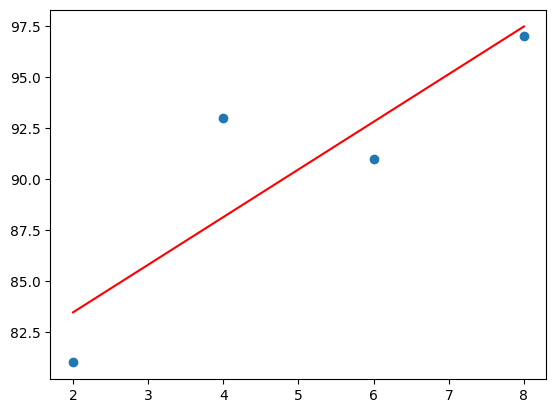

epoch=700,  기울기=2.3134,   절편=78.9201,   Cost(MSE)=8.3011


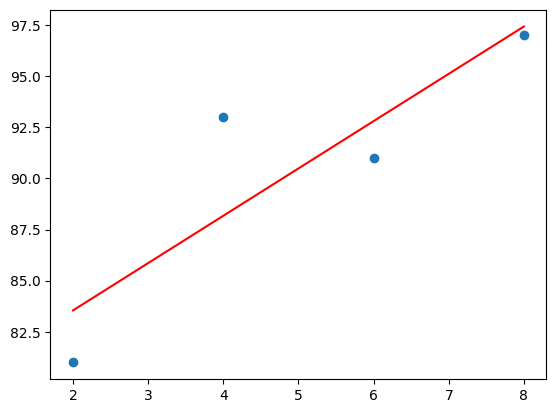

epoch=800,  기울기=2.3050,   절편=78.9699,   Cost(MSE)=8.3002


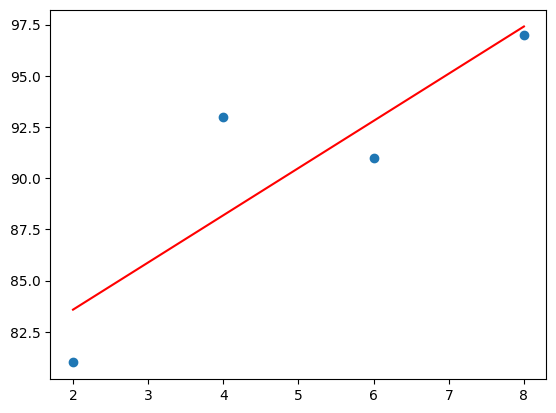

epoch=900,  기울기=2.3019,   절편=78.9887,   Cost(MSE)=8.3000


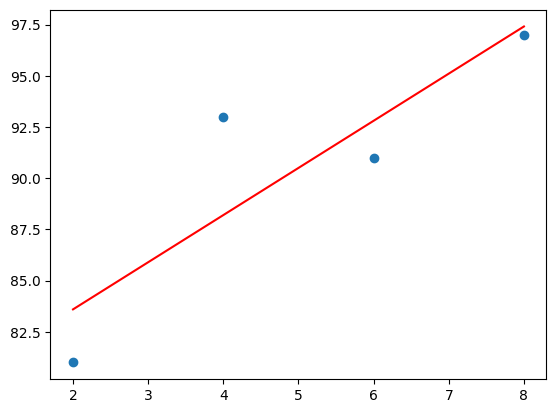

epoch=1000,  기울기=2.3007,   절편=78.9957,   Cost(MSE)=8.3000


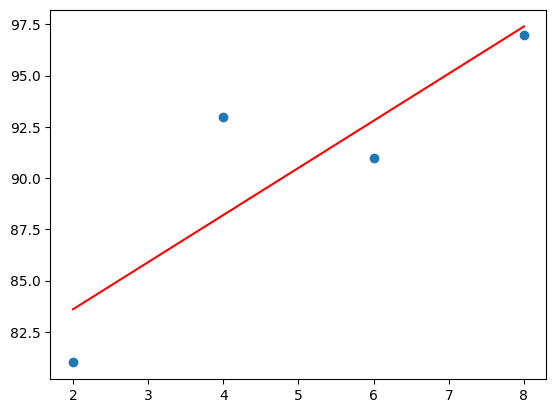

In [5]:
############################################################
# MSE와 편미분을 통한 경사하강법 : 공부시간/성적 예제
############################################################
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[2, 81], [4, 93], [6, 91], [8, 97]])
X = data[:, 0] # 공부시간
Y = data[:, 1] # 점수

# 합습할 변수 : a, b -> 초기화 (임의의 값)
a, b = 1, 1

# 하이퍼파라미터 초기값 : 학습률 (learning rate)
lr = 0.03

# 학습 횟수
epochs = 1000

# 학습을 기록할 리스트 준비
MSE_list, a_list, b_list = [], [], []

# 경사 하강법 학습 #####################
for i in range(epochs + 1): # + 1은 마지막 데이터를 print하기 위함
    Y_hat = a * X + b
    error = Y_hat - Y
    MSE = np.mean(error**2)
    dMSE_da = 2 * np.mean(error * X)
    dMSE_db = 2 * np.mean(error)

    # 학습률을 곱해 기존의 a와 b값을 업데이트.
    a = a - lr * dMSE_da
    b = b - lr * dMSE_db
    
    # 학습 데이터 기록
    a_list.append(a)
    b_list.append(b)
    MSE_list.append(MSE)
    
    if i % 100 == 0: # 100번 epoch마다 print
        print("epoch=%.f,  기울기=%.04f,   절편=%.04f,   Cost(MSE)=%.4f" %
              (i, a, b, MSE))
        # print(i, MSE, a, b, sep='\t')
        plt.scatter(X, Y)
        plt.plot(X, Y_hat, "r")
        plt.show()

Text(0, 0.5, 'a')

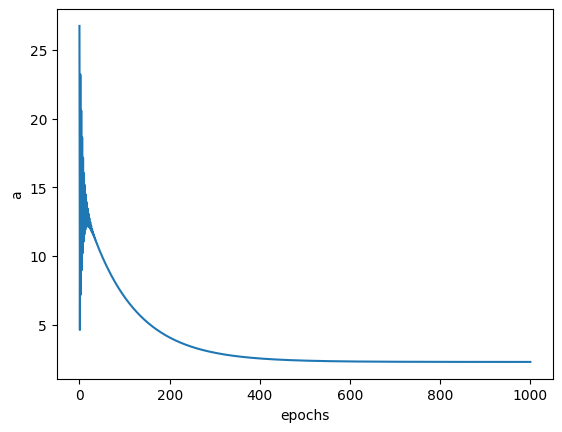

In [6]:
# 학습횟수에 따라 a 값
plt.plot(a_list)
plt.xlabel('epochs')
plt.ylabel('a')

Text(0, 0.5, 'MSE')

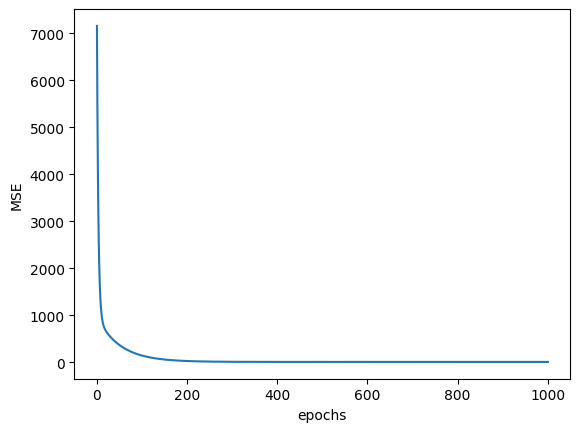

In [7]:
# 학습횟수에 따른 MSE
plt.plot(MSE_list)
plt.xlabel('epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'b')

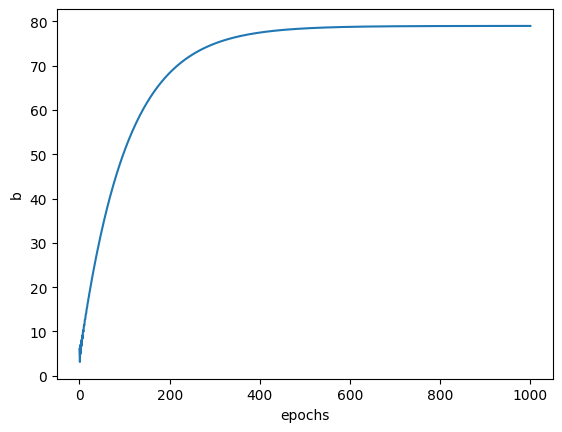

In [8]:
# 학습횟수에 따라 b 값
plt.plot(b_list)
plt.xlabel('epochs')
plt.ylabel('b')

Text(0, 0.5, 'MSE')

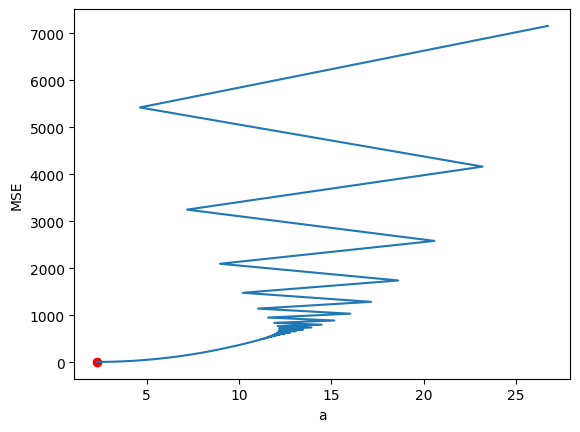

In [9]:
# a값의 변화에 따른 MSE의 변화
plt.plot(a_list, MSE_list)
plt.scatter(a_list[-1], MSE_list[-1], color="r")
plt.xlabel('a')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

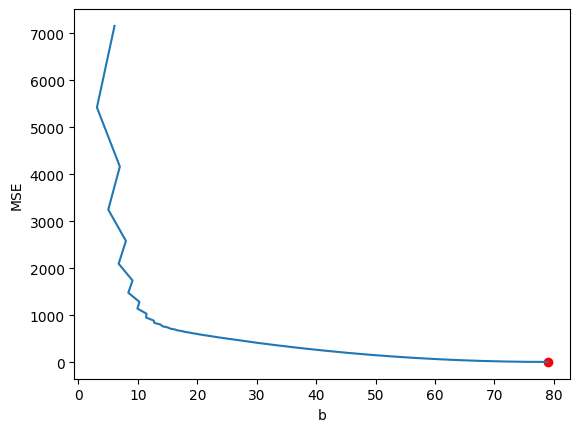

In [10]:
# b값의 변화에 따른 MSE의 변화
plt.plot(b_list, MSE_list)
plt.scatter(b_list[-1], MSE_list[-1], color="r")
plt.xlabel('b')
plt.ylabel('MSE')

In [11]:
X, Y

(array([2, 4, 6, 8]), array([81, 93, 91, 97]))

#### **Scikit Learn - LinearRegression을 활용한 선형회귀**

In [12]:
#########################################################
# Scikit learn의 LinearRegression 활용
#########################################################
from sklearn.linear_model import LinearRegression
import numpy as np

data = np.array([[2, 81], [4, 93], [6, 91], [8, 97]])
X = data[:, [0]] # 공부시간 (2차원 배열) : shape = (4, 1)
# X = data[:, 0] # 공부시간 (1차원 배열) : shape = (4, )
Y = data[:, 1] # 점수 : shape = (4, )
lr = LinearRegression()
lr.fit(X, Y)
lr.score(X, Y)  # R square 점수 (결정계수)

0.7611510791366911

In [13]:
lr.coef_, lr.intercept_

(array([2.3]), 79.0)

In [14]:
## 예측 ( 5시간, 7시간 공부시간에 대한 예측 점수)
lr.predict([[5], [7]])

array([90.5, 95.1])